### Hipótese 5 (KNN)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível predizer a plataforma de um game baseado em suas vendas?

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [2]:
game = pd.read_csv('vgsales.csv', sep=',', encoding='utf-8')

In [3]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
X = game.iloc[:, 6:11].values  
y = game.iloc[:, 2].values 

In [5]:
X

array([[4.149e+01, 2.902e+01, 3.770e+00, 8.460e+00, 8.274e+01],
       [2.908e+01, 3.580e+00, 6.810e+00, 7.700e-01, 4.024e+01],
       [1.585e+01, 1.288e+01, 3.790e+00, 3.310e+00, 3.582e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02],
       [0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00, 1.000e-02],
       [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-02]])

In [6]:
y

array(['Wii', 'NES', 'Wii', ..., 'PS2', 'DS', 'GBA'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[-0.23151384, -0.22795637, -0.25055993, -0.21589584, -0.26970962],
       [-0.31426598, -0.28709598,  0.03545578, -0.27361237, -0.28231199],
       [-0.23151384, -0.18852996, -0.25055993, -0.21589584, -0.25710724],
       ...,
       [-0.19604864,  0.00860207, -0.25055993,  0.07268684, -0.14368587],
       [ 0.15860336,  0.00860207, -0.25055993, -0.21589584,  0.01384382],
       [-0.30244425, -0.28709598, -0.25055993, -0.27361237, -0.33272149]])

In [10]:
X_test

array([[-0.31426598, -0.28709598, -0.12344184, -0.27361237, -0.31381793],
       [-0.26697905, -0.05053754, -0.25055993, -0.10046276, -0.21299893],
       [-0.30244425, -0.28709598, -0.25055993, -0.27361237, -0.33272149],
       ...,
       [-0.14876171, -0.24766957, -0.25055993, -0.21589584, -0.2256013 ],
       [-0.31426598, -0.28709598, -0.02810327, -0.27361237, -0.29491437],
       [-0.18422691, -0.22795637, -0.25055993, -0.27361237, -0.25080605]])

In [11]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 24   0   0   1   0   0   0   0   1   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  18   0  12   0   6   1   0   0   0   0   3   7  19   4   1   9   1
    0   4   4   0   7   0   1]
 [  1   2   0   2   0   1   0   0   0   1   0   0   0   1   0   0   3   0
    1   1   0   0   0   0   0]
 [  1  34   1 183   0  13   3   0   2   2   0  14   5  37   9   0  50  18
    0   3  40   1  45   5   0]
 [  0   3   0   1   3   0   1   0   0   3   0   0   1   5   0   0   0   0
    0   5   0   0   0   0   0]
 [  0   3   0   6   0  97   6   0   0   2   0   0   2   2   1   0   1   0
    0   2   0   0   0  10   0]
 [  0   1   1   7   1  23  63   0   7   0   0   0   0   2   1   0   0   0
    0   0   0   0   0  20   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   1   0
    0   0   0   0   0   0   0]
 [  4   0   0   3   0   7  10   1  23   0   0   0   1   1   0   0   2   2
    0   0   0   0   1   4   0]
 [  0   0   0   1   2   0   0   0   1   1   0   0   1  

/home/joaopaulo/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
success = []

In [15]:
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    success.append(np.mean(pred_i == y_test))

In [16]:
success

[0.4343373493975904,
 0.42289156626506025,
 0.42409638554216866,
 0.4280120481927711,
 0.43644578313253013,
 0.44216867469879517,
 0.4358433734939759,
 0.4319277108433735,
 0.4430722891566265,
 0.4469879518072289,
 0.4433734939759036,
 0.4433734939759036,
 0.44879518072289154,
 0.44457831325301206,
 0.4457831325301205,
 0.44819277108433736,
 0.44608433734939756,
 0.44246987951807226,
 0.44367469879518073,
 0.44367469879518073,
 0.4430722891566265,
 0.4397590361445783,
 0.44006024096385543,
 0.44156626506024094,
 0.44096385542168676,
 0.43493975903614457,
 0.43614457831325304,
 0.4343373493975904,
 0.43373493975903615,
 0.4316265060240964,
 0.4295180722891566,
 0.43012048192771085,
 0.4307228915662651,
 0.42981927710843376,
 0.4322289156626506,
 0.4295180722891566,
 0.42680722891566264,
 0.4286144578313253,
 0.42620481927710846,
 0.4274096385542169,
 0.42680722891566264,
 0.42620481927710846,
 0.42620481927710846,
 0.4259036144578313,
 0.42319277108433734,
 0.42259036144578316,
 0.41867

Text(0, 0.5, 'Media de Acerto')

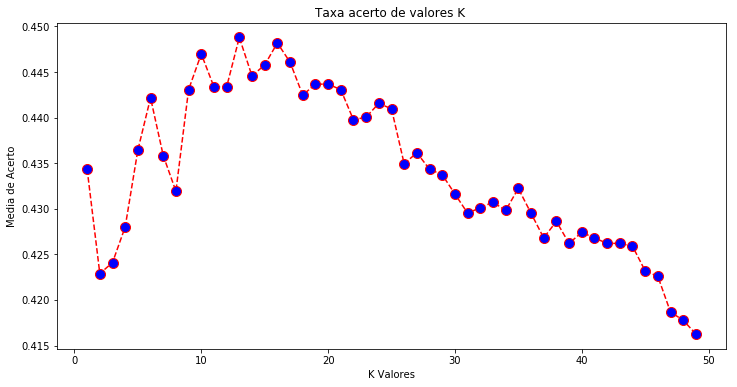

In [17]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), success, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto de valores K ')  
plt.xlabel('K Valores')  
plt.ylabel('Media de Acerto')

### Conclusão

O melhor resultado que obtemos foi quando se estabelecem algo próximo à 15 vizinhos, tendo uma taxa de acerto média por volta dos 45%. Porém esse valor é baixo e a hipótese acabou sendo refutada, ou seja, não é possível classificar a plataforma de um jogo com precisão baseado apenas nas suas vendas.